## PDF Layout Parsing

- Uses PDF metadata to extract text and tables. 

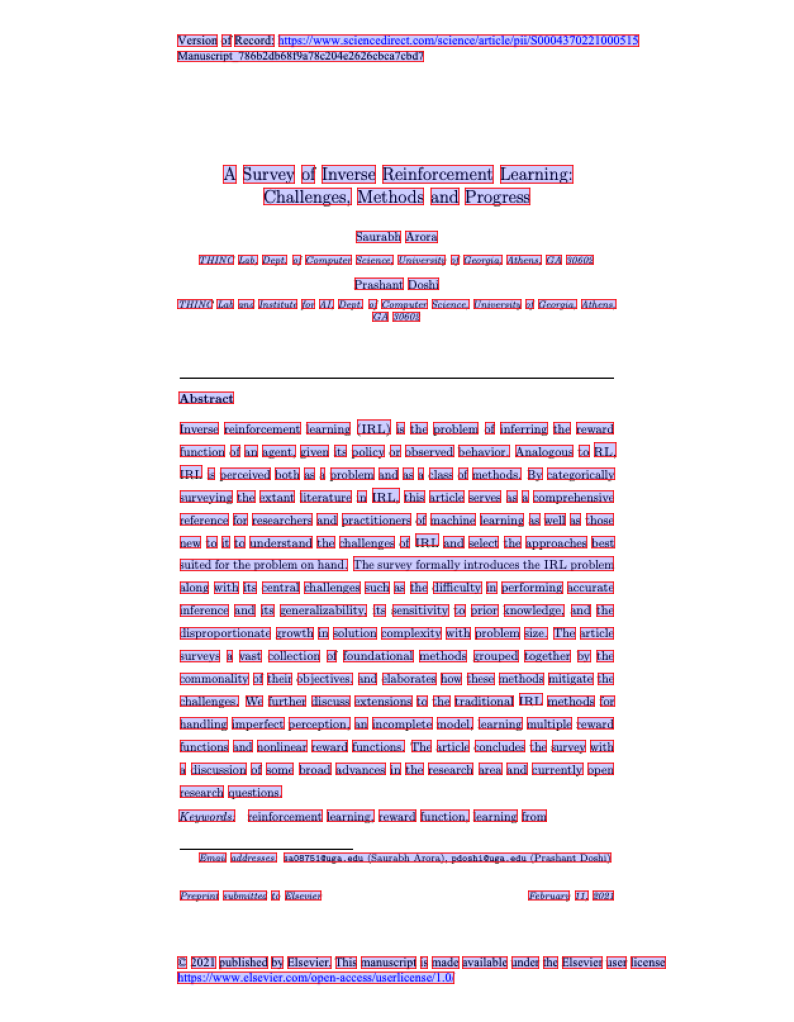

In [51]:
import pdfplumber
import matplotlib.pyplot as plt

# Open the PDF file
pdf_path = "/Users/pranjal/Desktop/applied-science/dl/1-s2.0-S0004370221000515-am (1).pdf"
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    
    # Extract words with their bounding boxes
    words = page.extract_words()
    
    # Convert the page to an image
    page_image = page.to_image()
    
    # Draw rectangles around the words
    page_image.draw_rects(words)
    
    # Display the image
    plt.figure(figsize=(10, 15))
    plt.imshow(page_image.annotated)
    plt.axis('off')
    plt.show()


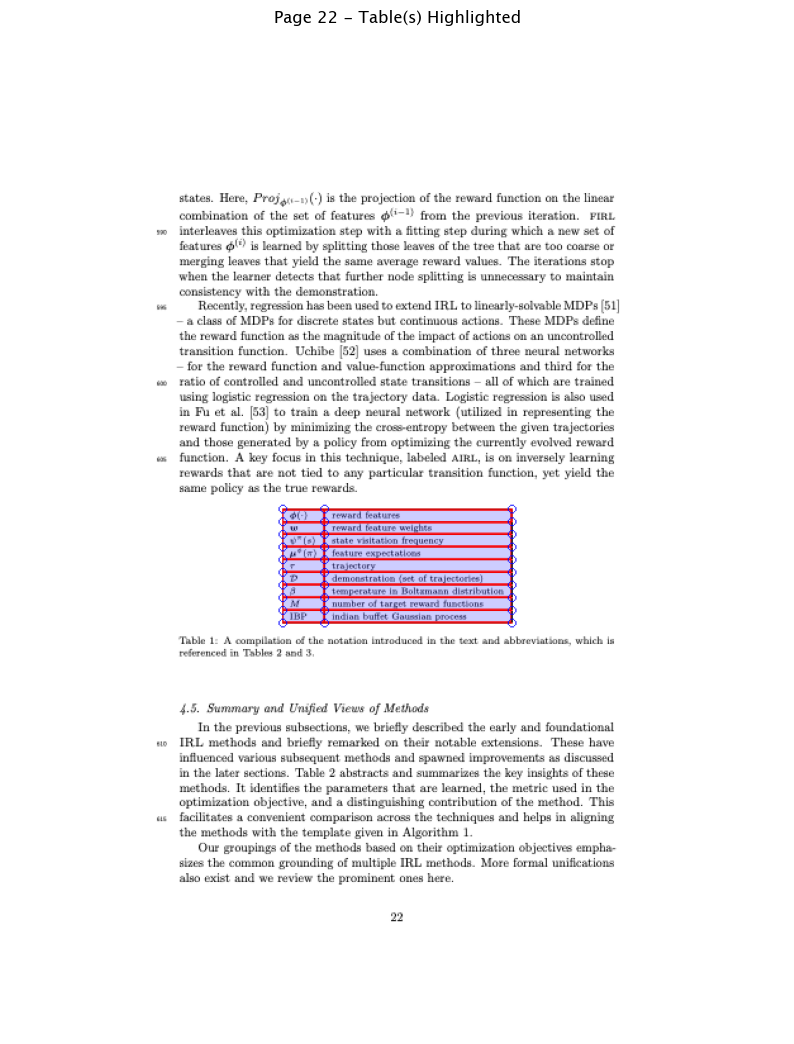

In [54]:
import pdfplumber
import matplotlib.pyplot as plt

# Path to your PDF file
pdf_path = "/Users/pranjal/Desktop/applied-science/dl/1-s2.0-S0004370221000515-am (1).pdf"

# Open the PDF file
with pdfplumber.open(pdf_path) as pdf:
    # Iterate over each page
    for page_number, page in enumerate(pdf.pages, start=1):
        # Extract tables from the current page
        tables = page.extract_tables()
        
        # If tables are found, visualize them
        if tables:
            # Render the page to an image
            page_image = page.to_image()
            # Highlight detected table areas
            page_image.debug_tablefinder()
            
            # Display the image with the table highlighted
            plt.figure(figsize=(10, 15))
            plt.imshow(page_image.annotated)
            plt.axis('off')
            plt.title(f'Page {page_number} - Table(s) Highlighted')
            plt.show()
            break


### OCR from Image

In [55]:
import pytesseract

# Set Tesseract command path
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

# Example usage
from PIL import Image

image = Image.open("parse.jpeg")
text = pytesseract.image_to_string(image)
print(text)


Since the dataset is considered imbalanced, then any kind
of alternative methods such as oversampling technique and
the choice of different Machine Learning algorithms are
implemented as well. The last step would be observing the
accuracy and the F1 score of the model.

B. Task II

The first step that should be done in an image
classification task is ingesting the training and validation
data, and then preprocess them straight away such that they
have a consistent size. Next, the pixel value in each of the
images needs to be normalized as well.

After the preprocessing step is done, then an appropriate
CNN model needs to be built. For this project, there are two
CNN models that have been implemented. The first model is
a custom model, meaning that the CNN model is built from
the scratch. Meanwhile, the second model is built by utilizing
the transfer learning method from InceptionV3 model, in
which its weight has been trained on ImageNet dataset.

After each training, the learning curve

### Layout Parsing from Image

In [32]:
import layoutparser as lp
from PIL import Image

# Load the image
image = Image.open("parse.jpeg")

# Specify the local path to the downloaded model weights
model_path = "/Users/pranjal/Code/model_final.pth"  # Adjust this path if needed

# Use the pre-trained model for layout detection
model = lp.Detectron2LayoutModel(
    config_path="lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config",
    model_path=model_path,  # Use the downloaded model weights
    label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"}
)

# Perform layout detection
layout = model.detect(image)

# Print detected layout
print(layout)


/opt/homebrew/lib/python3.11/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Layout(_blocks=[TextBlock(block=Rectangle(x_1=106.86225891113281, y_1=477.875732421875, x_2=685.5155639648438, y_2=653.783935546875), text=None, id=None, type=Text, parent=None, next=None, score=0.9991390705108643), TextBlock(block=Rectangle(x_1=718.937255859375, y_1=1003.7222900390625, x_2=1299.26953125, y_2=1178.4671630859375), text=None, id=None, type=Text, parent=None, next=None, score=0.9983459711074829), TextBlock(block=Rectangle(x_1=723.6408081054688, y_1=222.61326599121094, x_2=1297.0283203125, y_2=503.6637878417969), text=None, id=None, type=Text, parent=None, next=None, score=0.9980499744415283), TextBlock(block=Rectangle(x_1=98.15658569335938, y_1=1133.53759765625, x_2=689.4254150390625, y_2=1334.55224609375), text=None, id=None, type=Text, parent=None, next=None, score=0.9979294538497925), TextBlock(block=Rectangle(x_1=721.9019165039062, y_1=1590.776611328125, x_2=1299.677490234375, y_2=1772.5469970703125), text=None, id=None, type=Text, parent=None, next=None, score=0.9976

# Layout Parsers from Image

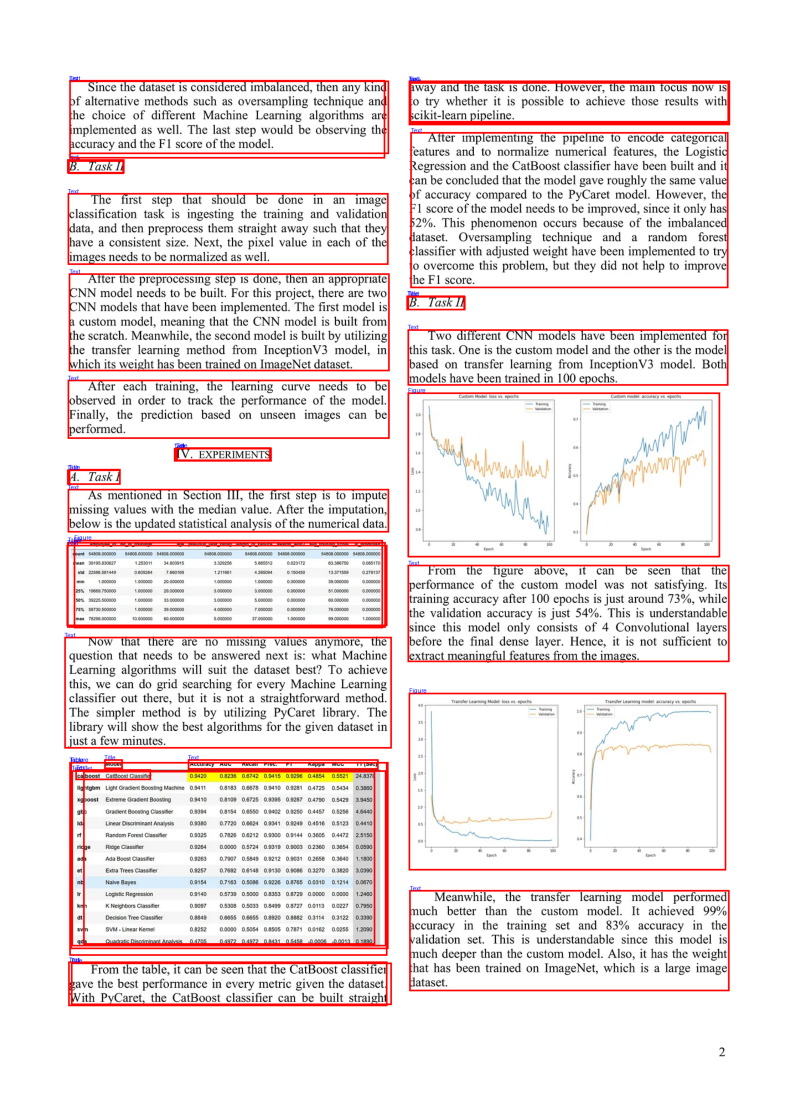

In [33]:
import layoutparser as lp
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the image
image = Image.open("parse.jpeg")

# Draw the detected layout on the image
def overlay_layout(image, layout):
    draw = ImageDraw.Draw(image)
    for block in layout:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = block.block.x_1, block.block.y_1, block.block.x_2, block.block.y_2
        # Draw rectangle
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        # Add type label
        draw.text((x1, y1 - 10), block.type, fill="blue")
    return image

# Visualize the layout
overlayed_image = overlay_layout(image.copy(), layout)
plt.figure(figsize=(10, 15))
plt.imshow(overlayed_image)
plt.axis("off")
plt.show()


# Layout Parser from Image + OCR

/opt/homebrew/lib/python3.11/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu

Region Type: Text, Bounding Box: (106, 477, 685, 653)
Extracted Text: After the preprocessing step is done, then an appropriate
CNN model needs to be built. For this project, there are two
CNN models that have been implemented. The first model is
a custom model, meaning that the CNN model is built from
the scratch. Meanwhile, the second model is built by utilizing
the transfer learning method from InceptionV3 model, in
which its weight has been trained on ImageNet dataset.
--------------------------------------------------
Region Type: Text, Bounding Box: (718, 1003, 1299, 1178)
Extracted Text: From the figure above, it can be seen that the
performance of the custom model was not satisfying. Its
training accuracy after 100 epochs is just around 73%, while
the validation accuracy is just 54%. This is understandable
since this model only consists of 4 Convolutional layers
before the final dense layer. Hence, it is not sufficient to
extract meaningful features from the images.
-----------

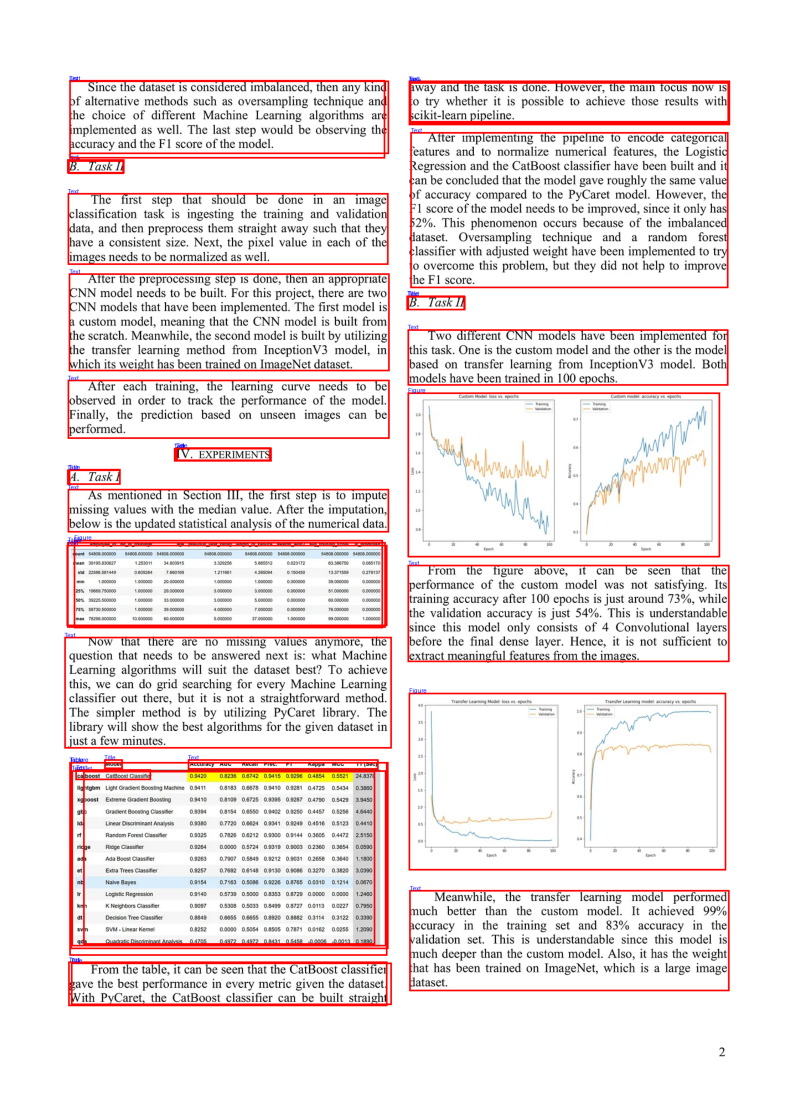

In [4]:
import layoutparser as lp
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import pytesseract

# Load the image
image = Image.open("parse.jpeg")

# Use a pre-trained layoutparser model to detect layout
model = lp.Detectron2LayoutModel(
    config_path="lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config",
model_path = "/Users/pranjal/Code/model_final.pth",  # Adjust this path if needed
    label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"}
)

# Detect layout
layout = model.detect(image)

# Set Tesseract command path
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

# Function to extract text from each detected region using Tesseract
def extract_text_from_layout(image, layout):
    results = []
    for block in layout:
        if block.type == "Text":  # Apply OCR only to 'Text' regions
            x1, y1, x2, y2 = map(int, [block.block.x_1, block.block.y_1, block.block.x_2, block.block.y_2])
            cropped_region = image.crop((x1, y1, x2, y2))  # Crop the detected region
            text = pytesseract.image_to_string(cropped_region)  # Extract text with Tesseract
            results.append({"type": block.type, "text": text.strip(), "bbox": (x1, y1, x2, y2)})
    return results

# Extract text from detected layout
extracted_texts = extract_text_from_layout(image, layout)

# Display extracted text
for region in extracted_texts:
    print(f"Region Type: {region['type']}, Bounding Box: {region['bbox']}")
    print(f"Extracted Text: {region['text']}")
    print("-" * 50)

# Optional: Visualize layout with bounding boxes
def overlay_layout(image, layout):
    draw = ImageDraw.Draw(image)
    for block in layout:
        x1, y1, x2, y2 = block.block.x_1, block.block.y_1, block.block.x_2, block.block.y_2
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        draw.text((x1, y1 - 10), block.type, fill="blue")
    return image

overlayed_image = overlay_layout(image.copy(), layout)
plt.figure(figsize=(10, 15))
plt.imshow(overlayed_image)
plt.axis("off")
plt.show()


### Named Entity Recognition

In [5]:
from transformers import pipeline

# Load the NER pipeline
ner_model = pipeline("ner", grouped_entities=True, model="dbmdz/bert-large-cased-finetuned-conll03-english")

def entity_and_event_recognition_transformers(extracted_texts):
    for region in extracted_texts:
        ner_results = ner_model(region['text'])  # Process the text with transformers NER model
        print(f"Region Type: {region['type']}, Bounding Box: {region['bbox']}")
        print(f"Extracted Text: {region['text']}")
        
        # Display recognized entities
        print("Entities:")
        for ent in ner_results:
            print(f"  - {ent['word']} ({ent['entity_group']}), Score: {ent['score']:.2f}")
        print("-" * 50)

# Perform entity and event recognition
entity_and_event_recognition_transformers(extracted_texts)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
/opt/homebrew/lib/python3.11/site-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


Region Type: Text, Bounding Box: (106, 477, 685, 653)
Extracted Text: After the preprocessing step is done, then an appropriate
CNN model needs to be built. For this project, there are two
CNN models that have been implemented. The first model is
a custom model, meaning that the CNN model is built from
the scratch. Meanwhile, the second model is built by utilizing
the transfer learning method from InceptionV3 model, in
which its weight has been trained on ImageNet dataset.
Entities:
  - CNN (ORG), Score: 0.57
  - CNN (ORG), Score: 0.49
  - CNN (ORG), Score: 0.83
  - Inc (MISC), Score: 0.92
  - ##ion (MISC), Score: 0.68
  - ##V (ORG), Score: 0.51
  - ImageNet (ORG), Score: 0.83
--------------------------------------------------
Region Type: Text, Bounding Box: (718, 1003, 1299, 1178)
Extracted Text: From the figure above, it can be seen that the
performance of the custom model was not satisfying. Its
training accuracy after 100 epochs is just around 73%, while
the validation accuracy is

### Topic Classification

In [ ]:
from transformers import pipeline

# Load a pre-trained text classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def topic_classification(extracted_texts):
    candidate_labels = ["Finance", "Health", "Technology", "Education", "Legal"]
    for region in extracted_texts:
        result = classifier(region['text'], candidate_labels)
        print(f"Region Type: {region['type']}, Bounding Box: {region['bbox']}")
        print(f"Extracted Text: {region['text']}")
        print(f"Predicted Topic: {result['labels'][0]} (Score: {result['scores'][0]:.2f})")
        print("-" * 50)

# Perform topic classification
topic_classification(extracted_texts)
